In [52]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from pytrends.request import TrendReq

plt.style.use('fivethirtyeight')
np.random.seed(777)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [131]:
pytrend = TrendReq(hl='tr-TR')

start_date = '2015-01-01'
end_date = '2019-12-31'
date_range = start_date + ' ' + end_date

st = ['trump'] # your search term

pytrend.build_payload(kw_list=st, timeframe = date_range)

trends = pytrend.interest_over_time()

In [132]:
df = trends.drop(columns='isPartial')
df.reset_index(inplace=True)
df.head()

,date,trump
0,2015-01-04,0
1,2015-01-11,0
2,2015-01-18,0
3,2015-01-25,0
4,2015-02-01,0


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 2 columns):
date     261 non-null datetime64[ns]
trump    261 non-null int32
dtypes: datetime64[ns](1), int32(1)
memory usage: 3.2 KB


In [134]:
df.columns=['Date', 'Trend']
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [135]:
df.head()

,Trend
Date,
2015-01-04,0
2015-01-11,0
2015-01-18,0
2015-01-25,0
2015-02-01,0


In [184]:
import matplotlib.style as style style.available

SyntaxError: invalid syntax (<ipython-input-184-971a562c6969>, line 1)

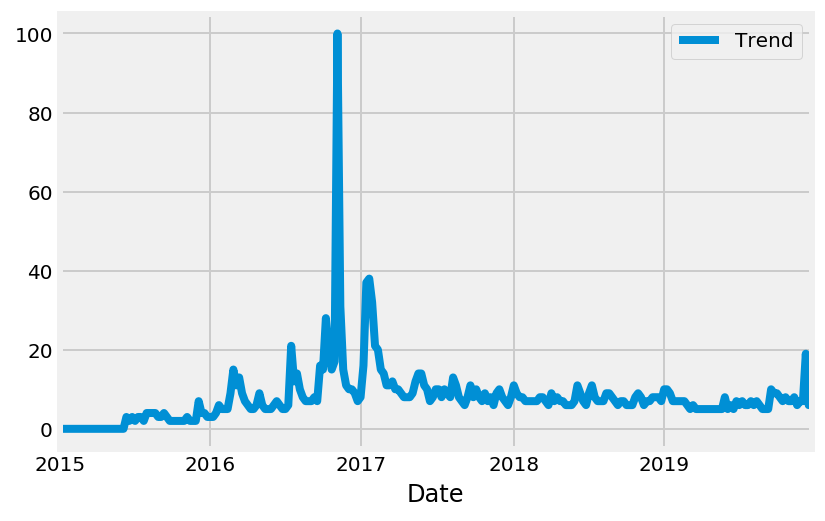

In [136]:
df.plot()

In [137]:
timeseries = df['Trend']

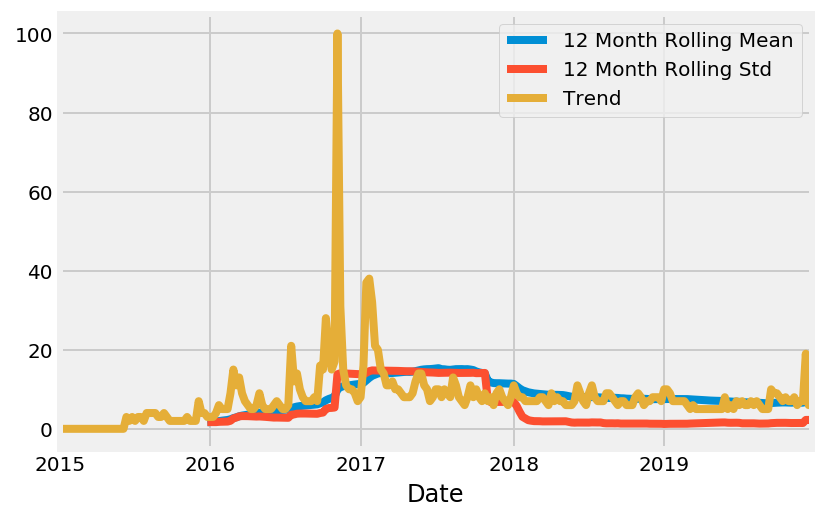

In [138]:
timeseries.rolling(52).mean().plot(label='12 Month Rolling Mean')
timeseries.rolling(52).std().plot(label='12 Month Rolling Std')
timeseries.plot()
plt.legend()

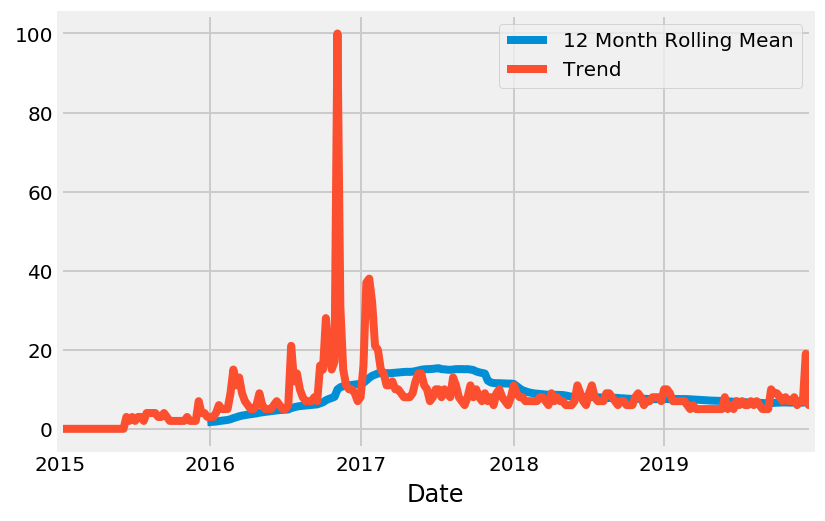

In [139]:
timeseries.rolling(52).mean().plot(label='12 Month Rolling Mean')
timeseries.plot()
plt.legend()

<Figure size 432x288 with 0 Axes>

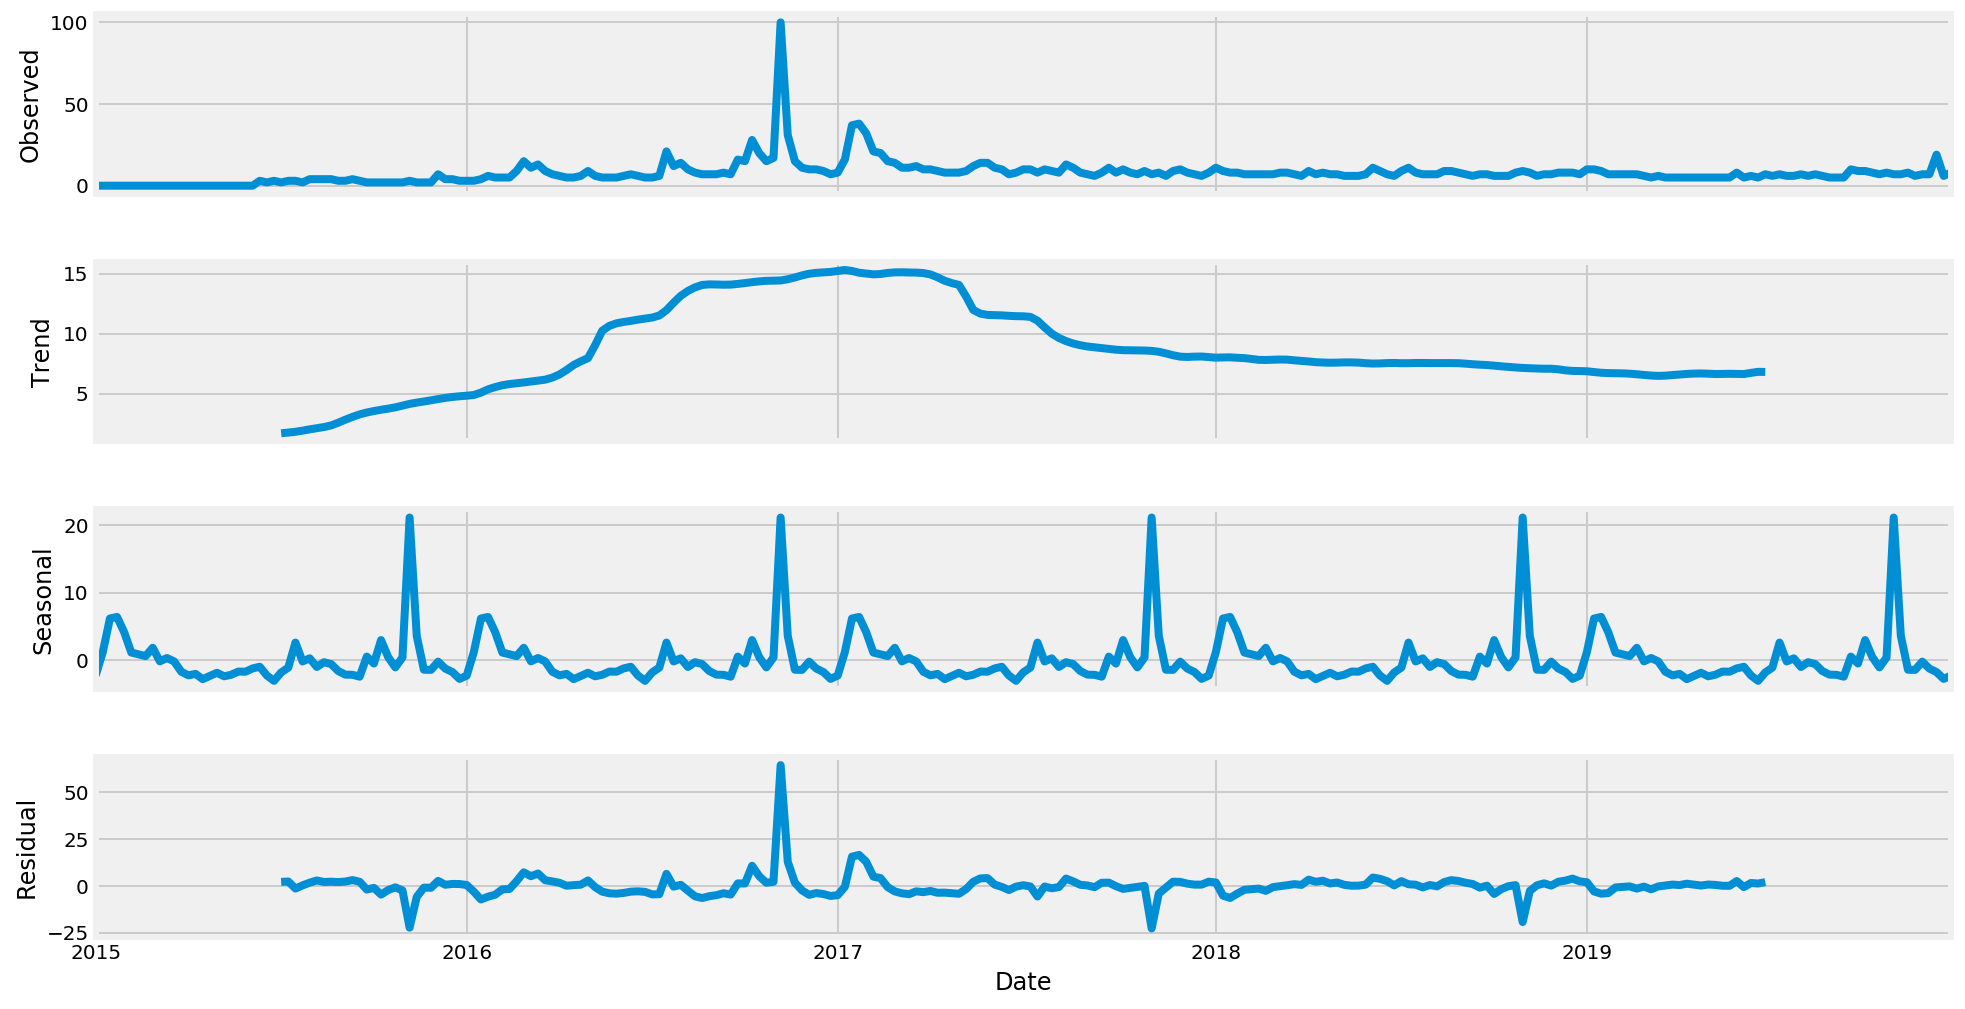

In [142]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Trend']) 
fig = plt.figure()
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

In [143]:
df.head()

,Trend
Date,
2015-01-04,0
2015-01-11,0
2015-01-18,0
2015-01-25,0
2015-02-01,0


In [144]:
from statsmodels.tsa.stattools import adfuller

In [145]:
result = adfuller(df['Trend'])

In [146]:
print('Augmented Dickey-Fuller Test:')
labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

for value,label in zip(result,labels):
    print(label+' : '+str(value) )
    
if result[1] <= 0.05:
    print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
else:
    print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

Augmented Dickey-Fuller Test:
ADF Test Statistic : -2.3285714447009167
p-value : 0.1629185995861041
#Lags Used : 10
Number of Observations Used : 250
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [147]:
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [148]:
df['Trend First Difference'] = df['Trend'] - df['Trend'].shift(1)

In [149]:
adf_check(df['Trend'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -2.3285714447009167
p-value : 0.1629185995861041
#Lags Used : 10
Number of Observations Used : 250
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


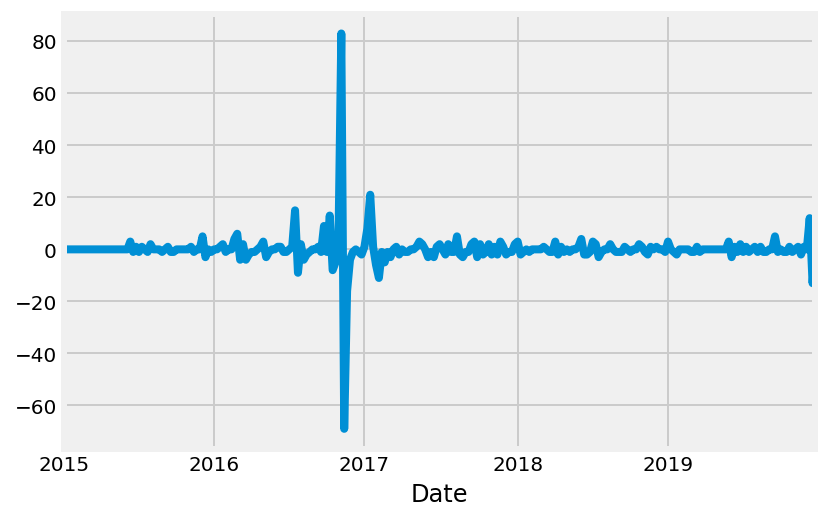

In [150]:
df['Trend First Difference'].plot()

In [151]:
# Sometimes it would be necessary to do a second difference 
# This is just for show, we didn't need to do a second difference in our case
df['Trend Second Difference'] = df['Trend First Difference'] - df['Trend First Difference'].shift(1)

In [152]:
adf_check(df['Trend Second Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -8.865740838508804
p-value : 1.442136782048026e-14
#Lags Used : 16
Number of Observations Used : 242
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


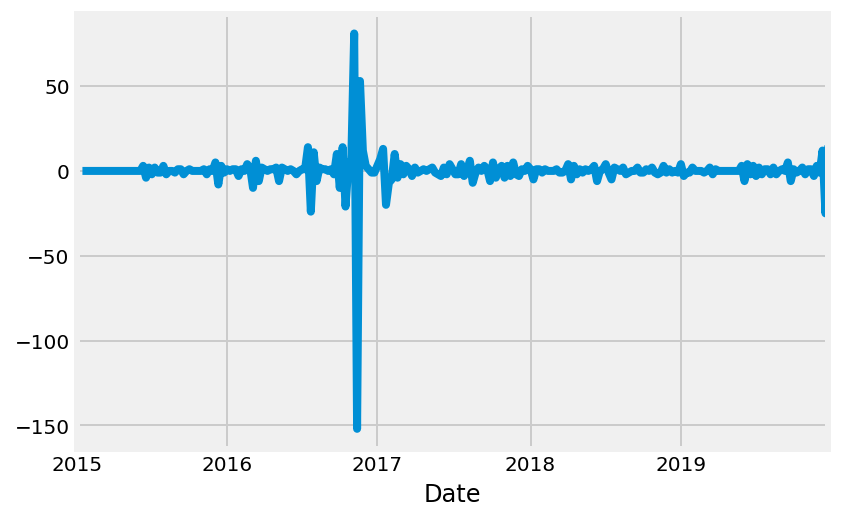

In [153]:
df['Trend Second Difference'].plot()

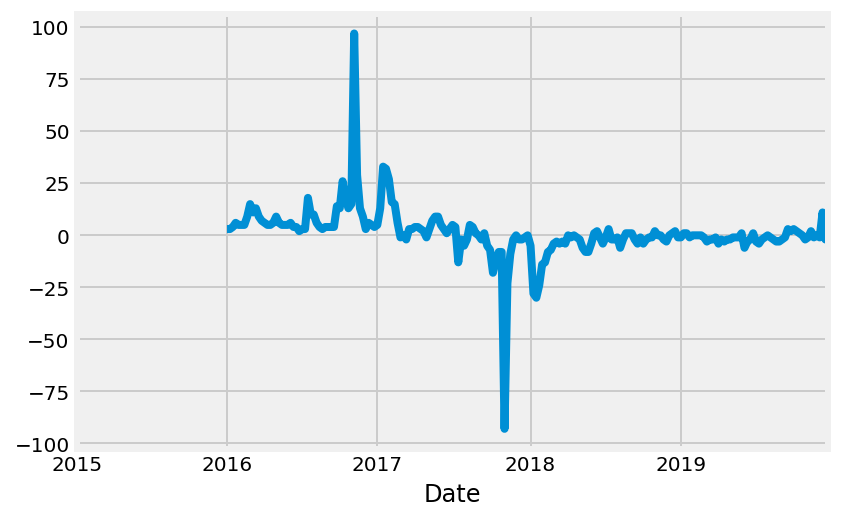

In [154]:
df['Seasonal Difference'] = df['Trend'] - df['Trend'].shift(52)
df['Seasonal Difference'].plot()

In [155]:
# Seasonal Difference by itself was not enough!
adf_check(df['Seasonal Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -2.102346062676934
p-value : 0.2435722849752347
#Lags Used : 9
Number of Observations Used : 199
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


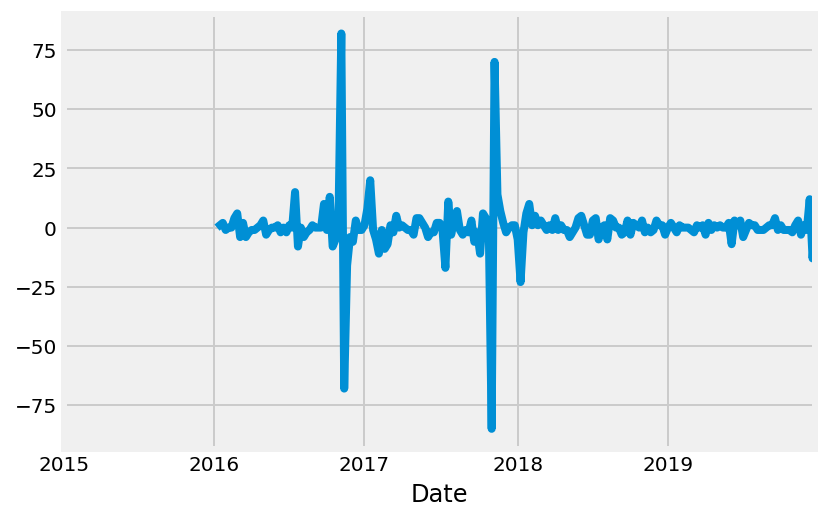

In [156]:
# You can also do seasonal first difference
df['Seasonal First Difference'] = df['Trend First Difference'] - df['Trend First Difference'].shift(52)
df['Seasonal First Difference'].plot()

In [157]:
adf_check(df['Seasonal First Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -8.635985430091202
p-value : 5.5893302746491755e-14
#Lags Used : 9
Number of Observations Used : 198
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [158]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

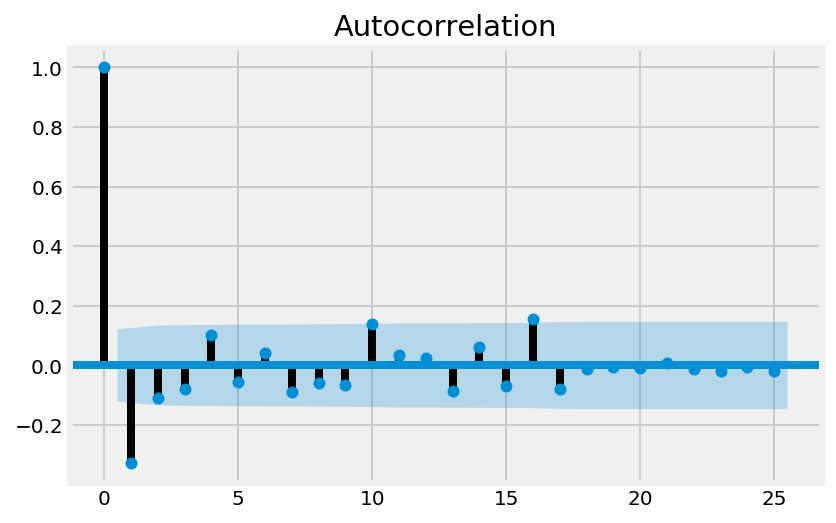

In [159]:
# Duplicate plots
# Check out: https://stackoverflow.com/questions/21788593/statsmodels-duplicate-charts
# https://github.com/statsmodels/statsmodels/issues/1265
fig_first = plot_acf(df["Trend First Difference"].dropna())

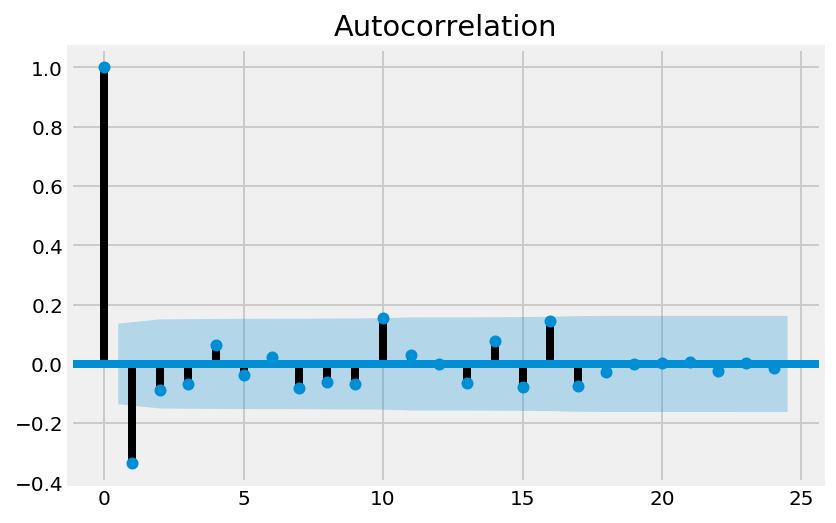

In [160]:
fig_seasonal_first = plot_acf(df["Seasonal First Difference"].dropna())

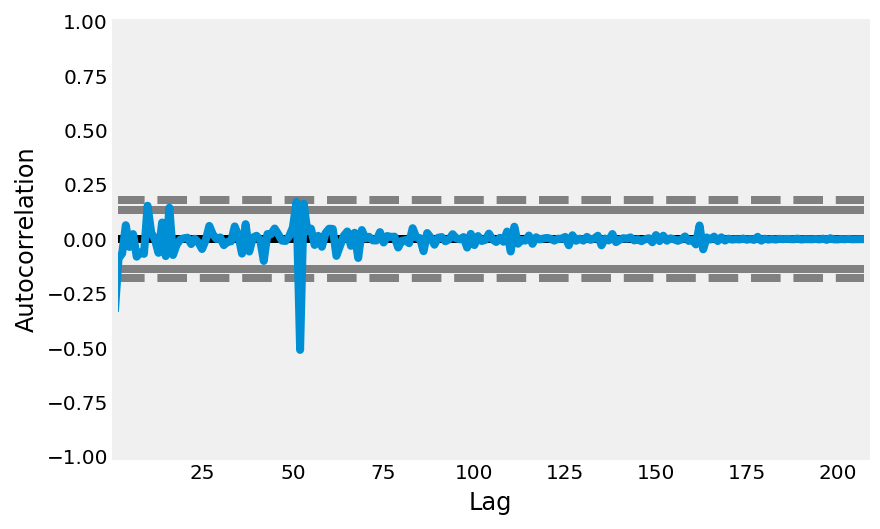

In [161]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Seasonal First Difference'].dropna())

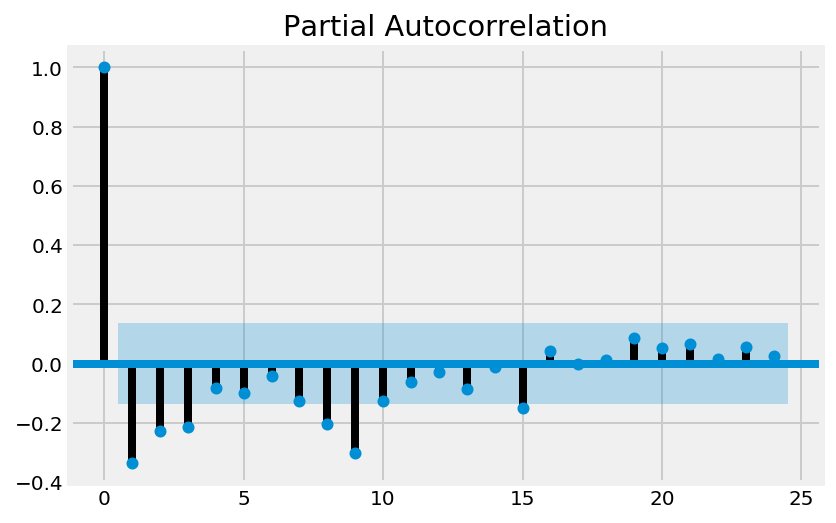

In [162]:
result = plot_pacf(df["Seasonal First Difference"].dropna())

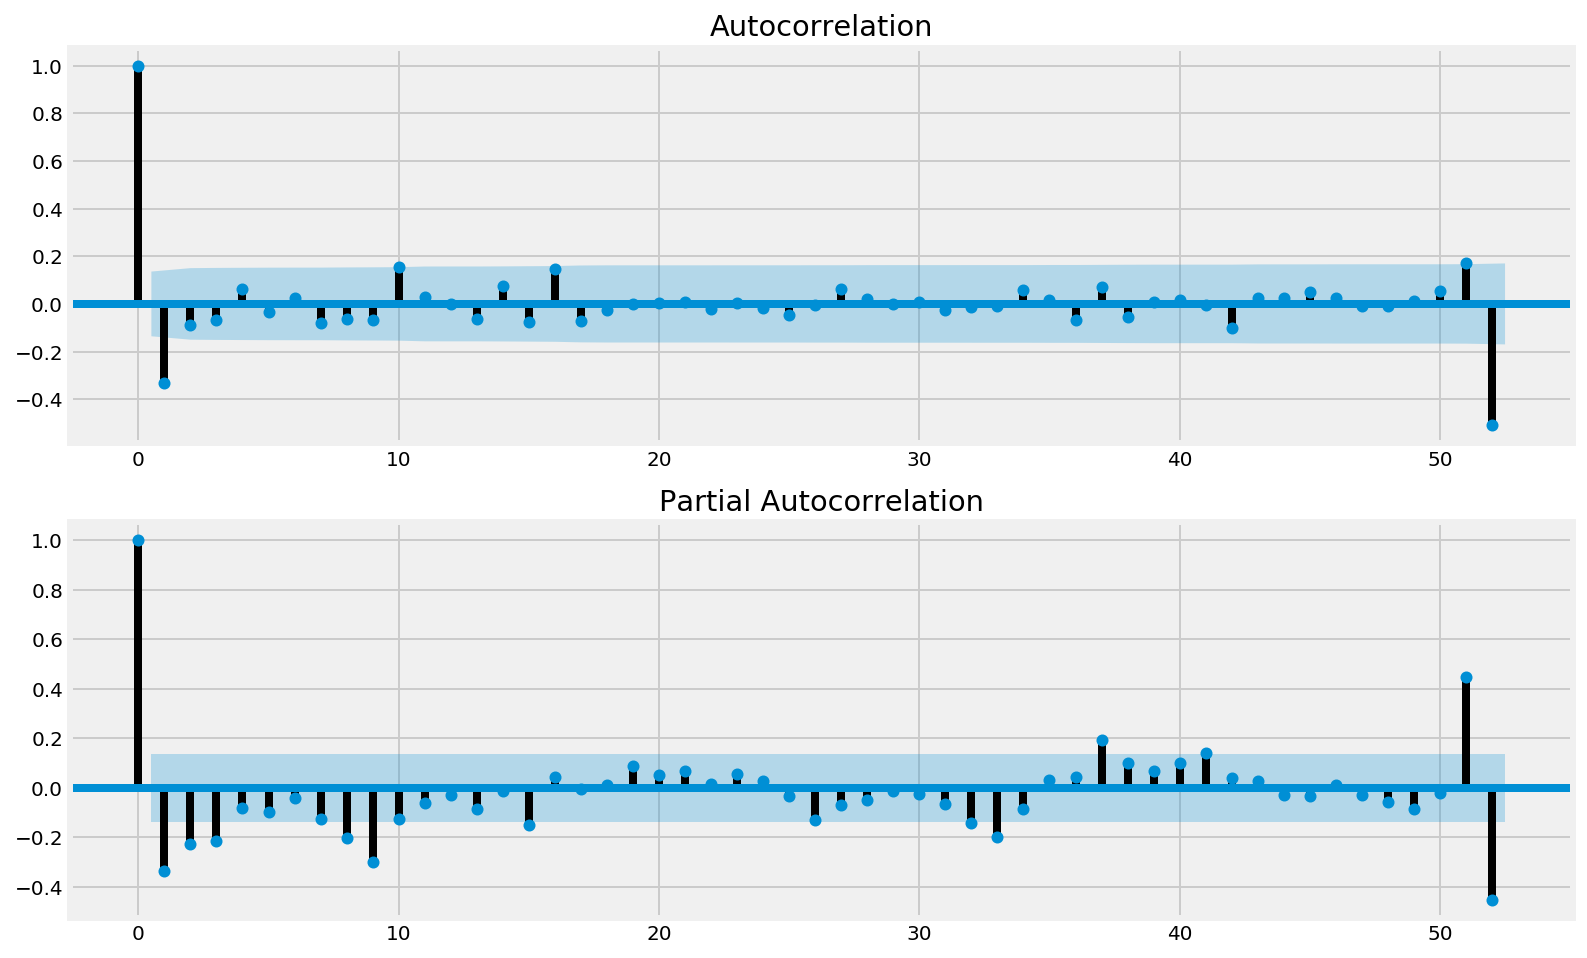

In [163]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[53:], lags=52, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[53:], lags=52, ax=ax2)

In [164]:
# For non-seasonal data
from statsmodels.tsa.arima_model import ARIMA

In [165]:
help(ARIMA)

Help on class ARIMA in module statsmodels.tsa.arima_model:

class ARIMA(ARMA)
 |  ARIMA(endog, order, exog=None, dates=None, freq=None, missing='none')
 |  
 |  Autoregressive Integrated Moving Average ARIMA(p,d,q) Model
 |  
 |  Parameters
 |  ----------
 |  endog : array-like
 |      The endogenous variable.
 |  order : iterable
 |      The (p,d,q) order of the model for the number of AR parameters,
 |      differences, and MA parameters to use.
 |  exog : array-like, optional
 |      An optional array of exogenous variables. This should *not* include a
 |      constant or trend. You can specify this in the `fit` method.
 |  dates : array-like of datetime, optional
 |      An array-like object of datetime objects. If a pandas object is given
 |      for endog or exog, it is assumed to have a DateIndex.
 |  freq : str, optional
 |      The frequency of the time-series. A Pandas offset or 'B', 'D', 'W',
 |      'M', 'A', or 'Q'. This is optional if dates are given.
 |  
 |  
 |  Notes


In [166]:
model = sm.tsa.statespace.SARIMAX(df['Trend'],order=(0,1,0), seasonal_order=(1,1,1,52))
results = model.fit()
print(results.summary())

C:\Users\sramar\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\sramar\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:993: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


                                 Statespace Model Results                                 
Dep. Variable:                              Trend   No. Observations:                  261
Model:             SARIMAX(0, 1, 0)x(1, 1, 1, 52)   Log Likelihood                -750.232
Date:                            Thu, 07 May 2020   AIC                           1506.463
Time:                                    03:51:28   BIC                           1516.476
Sample:                                01-04-2015   HQIC                          1510.512
                                     - 12-29-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L52      -0.1273      0.039     -3.239      0.001      -0.204      -0.050
ma.S.L52      -0.9989     34.296   

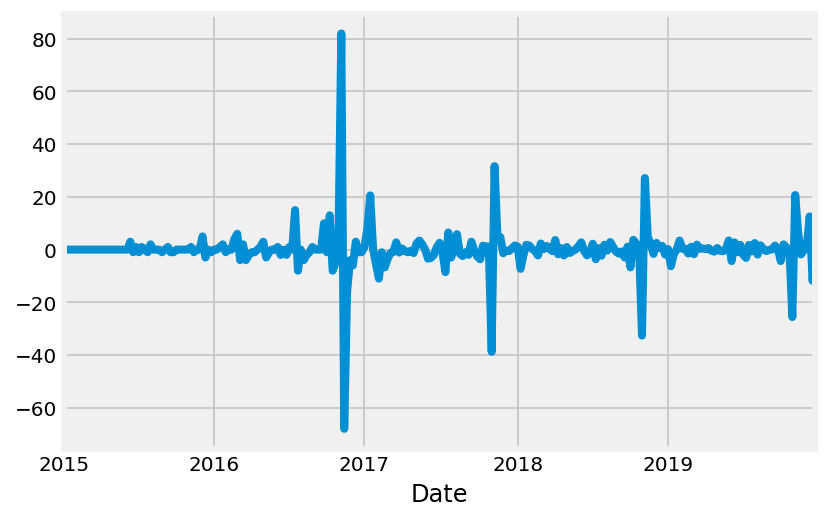

In [168]:
results.resid.plot()

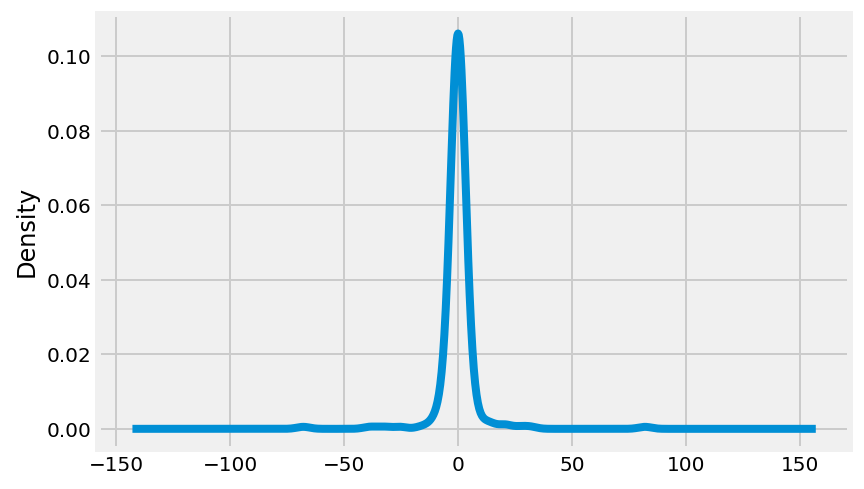

In [169]:
results.resid.plot(kind='kde')

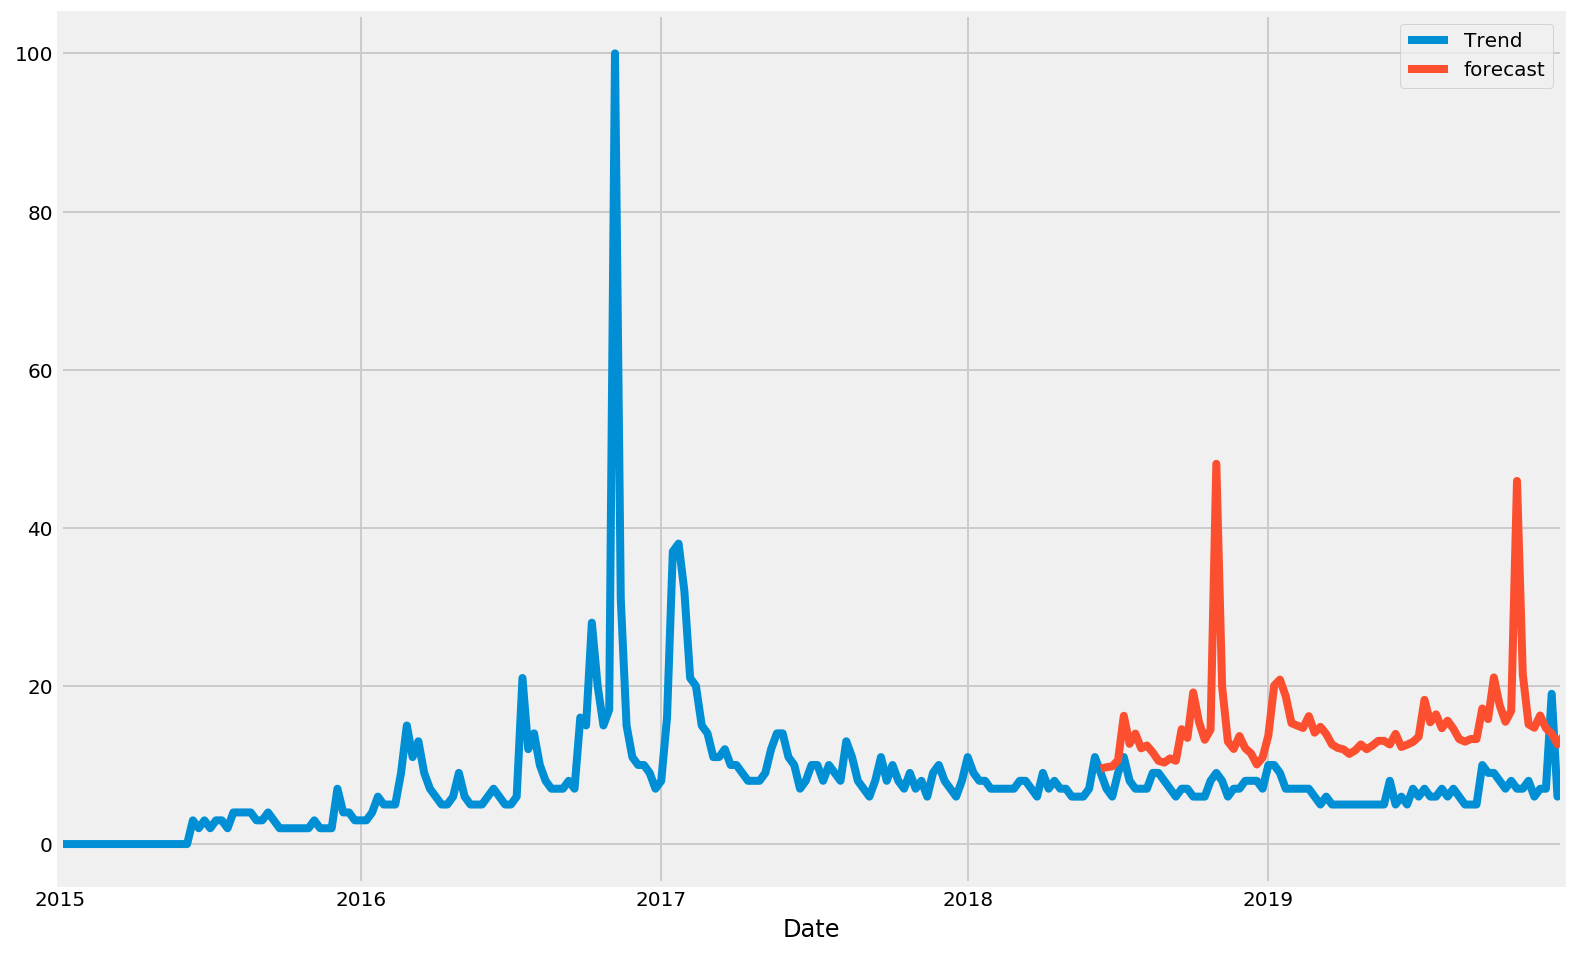

In [170]:
df['forecast'] = results.predict(start = 180, end= 364, dynamic= True)  
df[['Trend','forecast']].plot(figsize=(12,8))

In [171]:
df.tail()

,Trend,Trend First Difference,Trend Second Difference,Seasonal Difference,Seasonal First Difference,forecast
Date,,,,,,
2019-12-01,7,1.0,3.0,0.0,1.0,16.262168
2019-12-08,7,0.0,-1.0,-1.0,-1.0,14.656871
2019-12-15,19,12.0,12.0,11.0,12.0,13.971464
2019-12-22,6,-13.0,-25.0,-2.0,-13.0,12.616856
2019-12-29,8,2.0,15.0,1.0,3.0,13.633033


In [172]:
from pandas.tseries.offsets import DateOffset

In [173]:
future_dates = [df.index[-1] + DateOffset(weeks=x) for x in range(0,51) ]

In [174]:
future_dates_df = pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [175]:
future_df = pd.concat([df,future_dates_df])

In [176]:
future_df.head()

,Trend,Trend First Difference,Trend Second Difference,Seasonal Difference,Seasonal First Difference,forecast
2015-01-04,0,NaN,NaN,NaN,NaN,NaN
2015-01-11,0,0.0,NaN,NaN,NaN,NaN
2015-01-18,0,0.0,0.0,NaN,NaN,NaN
2015-01-25,0,0.0,0.0,NaN,NaN,NaN
2015-02-01,0,0.0,0.0,NaN,NaN,NaN


In [177]:
future_df.tail()

,Trend,Trend First Difference,Trend Second Difference,Seasonal Difference,Seasonal First Difference,forecast
2020-11-15,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-22,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-29,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-06,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-13,NaN,NaN,NaN,NaN,NaN,NaN


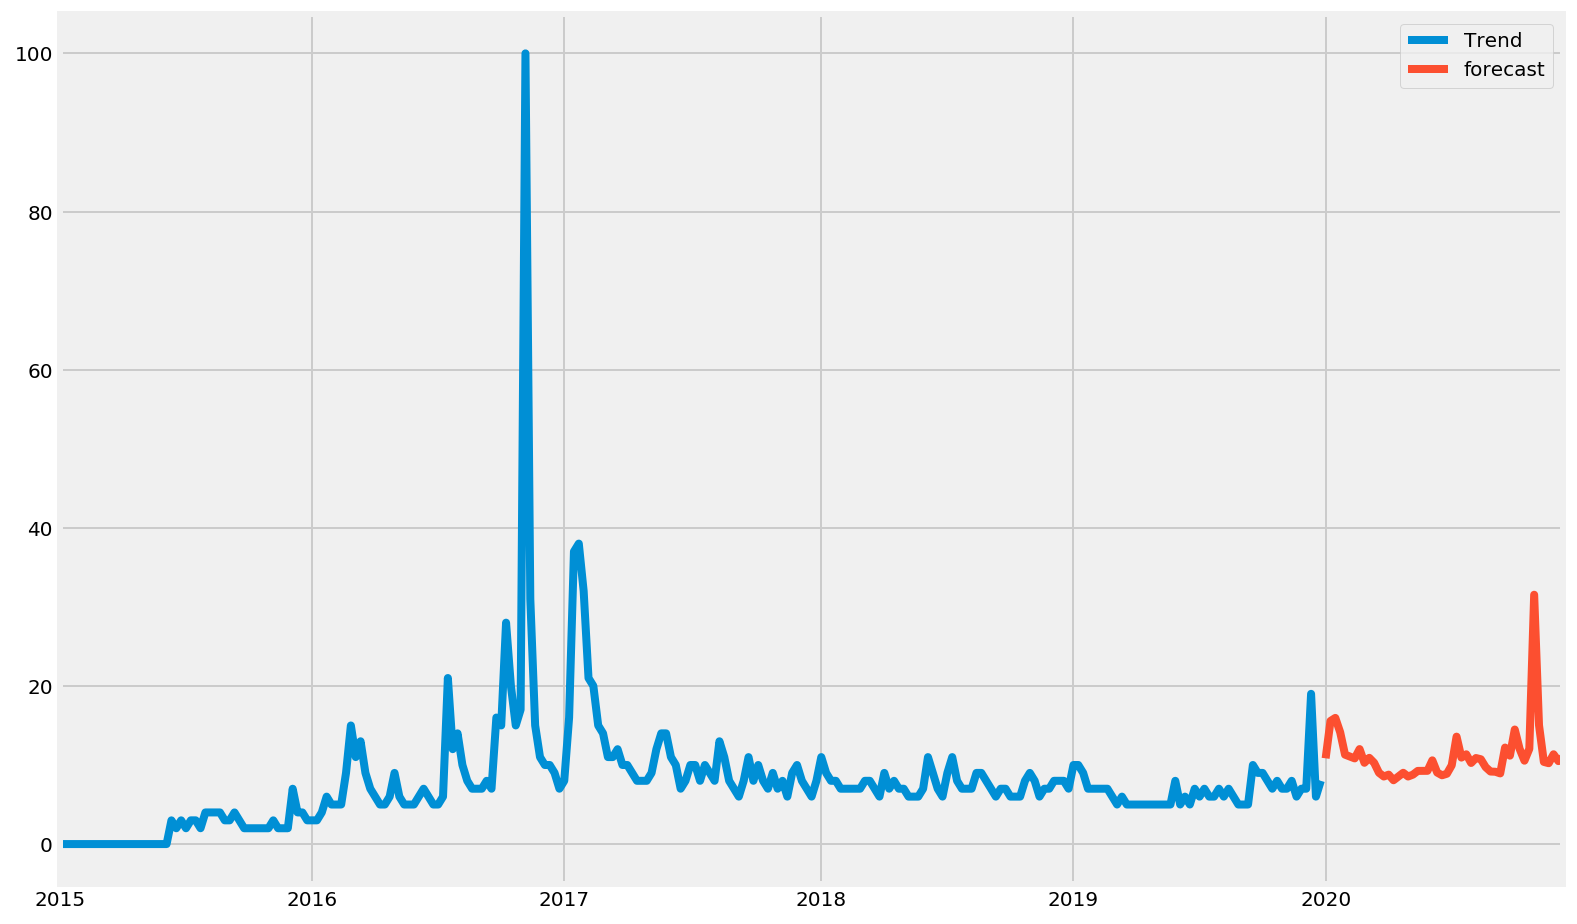

In [178]:
future_df['forecast'] = results.predict(start = 261, end = 312, dynamic= True)  
future_df[['Trend', 'forecast']].plot(figsize=(12, 8))

In [179]:
future_df[['Trend', 'forecast']]

,Trend,forecast
2015-01-04,0,NaN
2015-01-11,0,NaN
2015-01-18,0,NaN
2015-01-25,0,NaN
2015-02-01,0,NaN
...,...,...
2020-11-15,NaN,10.390074
2020-11-22,NaN,10.225777
2020-11-29,NaN,11.355229
2020-12-06,NaN,10.490722
